# Importing Necessary Libraries

In [30]:
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

import contractions
#import inflect

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Reading the Cleaned Data Set

In [31]:
df=  pd.read_csv('Cleaned_Women_ECommerce.csv')

In [32]:
df.head(3)

,Unnamed: 0,clothing_id,age,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,new_text,clean_text,review_length,rating_class,tokens
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,45,good,"['absolutely', 'wonderful', 'silky', 'sexy', '..."
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store...,195,good,"['love', 'dress', 'sooo', 'pretty', 'happened'..."
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,major design flaw high hope dress really wante...,338,neutral,"['major', 'design', 'flaw', 'high', 'hope', 'd..."


# Basic Information About the Data Set

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 15 columns):
Unnamed: 0                 22628 non-null int64
clothing_id                22628 non-null int64
age                        22628 non-null int64
review_text                22628 non-null object
rating                     22628 non-null int64
recommended_ind            22628 non-null int64
positive_feedback_count    22628 non-null int64
division_name              22628 non-null object
department_name            22628 non-null object
class_name                 22628 non-null object
new_text                   22628 non-null object
clean_text                 22628 non-null object
review_length              22628 non-null int64
rating_class               22628 non-null object
tokens                     22628 non-null object
dtypes: int64(7), object(8)
memory usage: 2.6+ MB


# Basic Statistics About the Data Set

In [34]:
df.describe()

,Unnamed: 0,clothing_id,age,rating,recommended_ind,positive_feedback_count,review_length
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,11737.272097,919.695908,43.282880,4.183092,0.818764,2.631784,206.005568
std,6781.574232,201.683804,12.328176,1.115911,0.385222,5.787520,91.552381
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,9.000000
25%,5868.750000,861.000000,34.000000,4.000000,1.000000,0.000000,129.000000
50%,11727.500000,936.000000,41.000000,5.000000,1.000000,1.000000,201.000000
75%,17617.250000,1078.000000,52.000000,5.000000,1.000000,3.000000,291.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,432.000000


# There is No Null Value in the Data Set

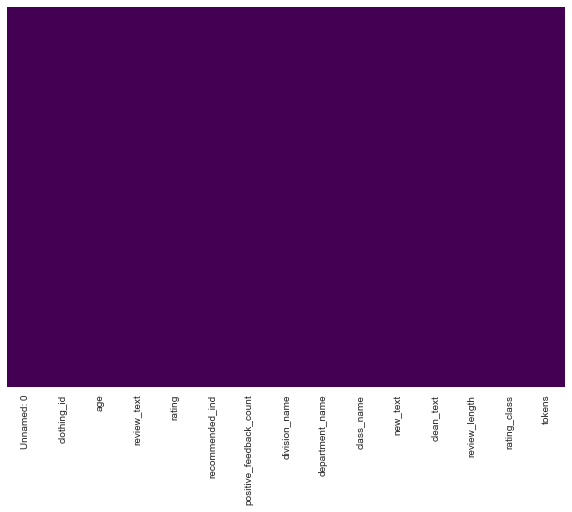

In [35]:
plt.figure(figsize = (10,7))
sns.set()
_ = sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

# Rating Numbers Based on the Departments

Text(0.5,1,'Department Name & Ratings Number Bar Plot')

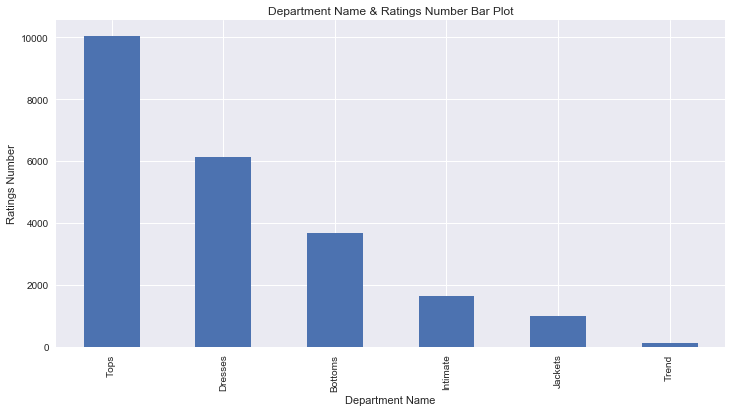

In [36]:
plt.figure(figsize = (12,6))
df_dep = df['department_name'].value_counts()
df_dep.plot.bar()
plt.xlabel('Department Name')
plt.ylabel('Ratings Number')
plt.title('Department Name & Ratings Number Bar Plot')

** On Department basis, Tops and Dresses are sold mostly. Trend is the weakest sold as seen.**

# Rating Numbers Based on the Class Name

Text(0.5,1,'Class Name & Ratings Number Bar Plot')

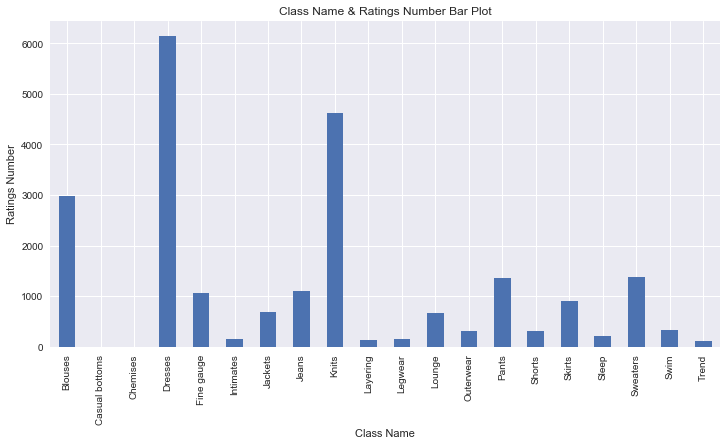

In [37]:
plt.figure(figsize = (12,6))
df_class = df.groupby('class_name')['rating'].count()
df_class.plot.bar()
plt.xlabel('Class Name')
plt.ylabel('Ratings Number')
plt.title('Class Name & Ratings Number Bar Plot')

** On Cloth type basis, Dresses, Knits ans Blouses have the best selling rates, however Intimates, Layering, Legwear and Trend have the least selling rates.** 

## Review Length and Customer Age Scatter Plot

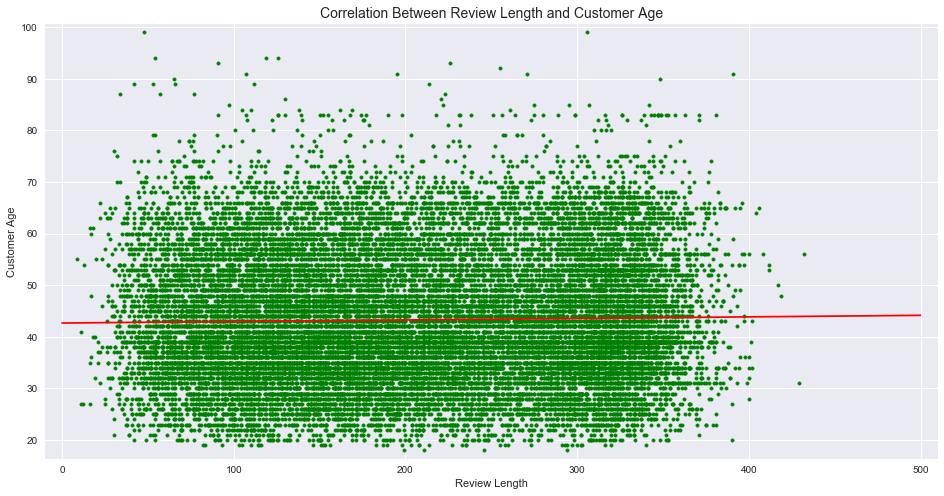

In [38]:
sns.set()
plt.figure(figsize = (16,8))
_ = plt.scatter(df['review_length'], df['age'], color = 'green', marker = '.', norm = True)

xm, ym = np.polyfit(df['review_length'], df['age'], 1)
# Make theoretical line to plot
x = np.array([0,500])
y_m = xm * x + ym
# Add regression line to your plot
_ = plt.plot(x, y_m, color='red')
_ = plt.ylabel('Customer Age')
_ = plt.xlabel('Review Length')
_ = plt.title('Correlation Between Review Length and Customer Age', size = 14)
plt.margins(0.02)

** There is a possitive correlation between Review Length and Customer Age. Mostly leaving review is around between 20 and 65 ages.**

# Review Length and Customer Age Joint Plot

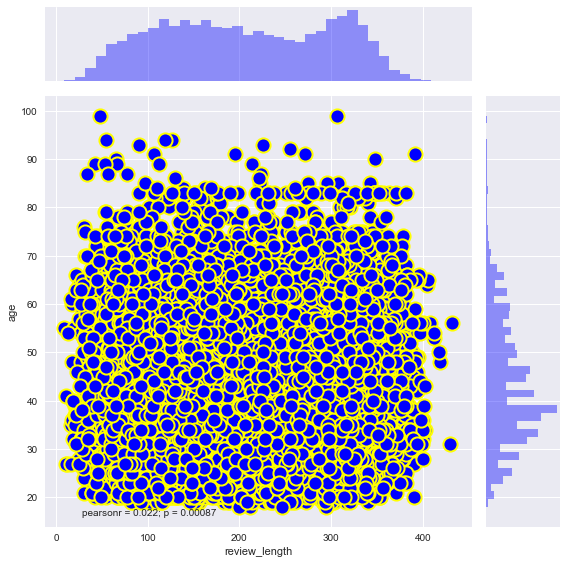

In [39]:
sns.jointplot(x=df["review_length"], y=df["age"], kind='scatter', 
              s=200, color='blue', edgecolor="yellow", size=8,linewidth=2)

## Review Length and Positive Feedback Scatter Plot

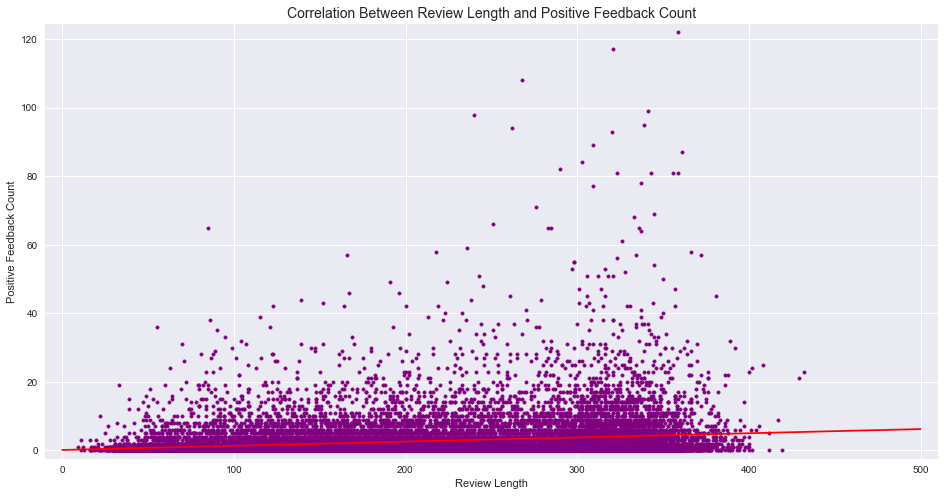

In [40]:
sns.set()
plt.figure(figsize = (16,8))
_ = plt.scatter(df['review_length'], df['positive_feedback_count'], color = 'purple', marker = '.', norm = True)

xm, ym = np.polyfit(df['review_length'], df['positive_feedback_count'], 1)
# Make theoretical line to plot
x = np.array([0,500])
y_m = xm * x + ym
# Add regression line to your plot
_ = plt.plot(x, y_m, color='red')
_ = plt.ylabel('Positive Feedback Count')
_ = plt.xlabel('Review Length')
_ = plt.title('Correlation Between Review Length and Positive Feedback Count', size = 14)
plt.margins(0.02)

**Most of the reviews has less than 20 positive feedbacks. There are some outliers which has more than 60 positive feedbacks. There is a possitive correlation between rating level and the positive feedback**

# Review Length and Positive Feedback Joint Plot

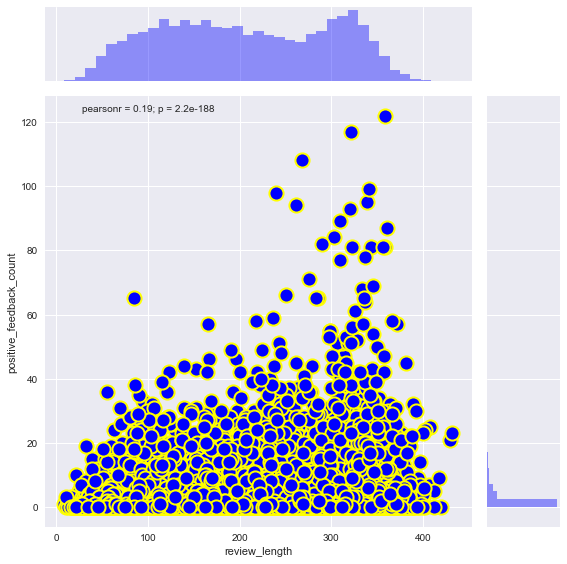

In [41]:
sns.jointplot(x=df["review_length"], y=df["positive_feedback_count"], kind='scatter', 
              s=200, color='blue', edgecolor="yellow", size=8,linewidth=2)

# Customer Age Distribution Plot

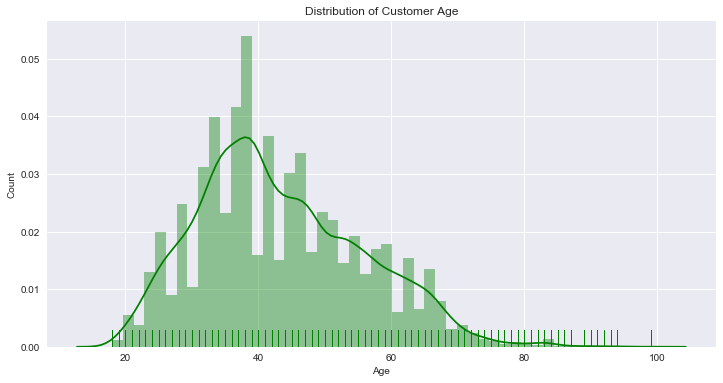

In [42]:
plt.rcParams["figure.figsize"] = (12,6)
_ = sns.distplot(df.age, rug='True', color = 'green')
_ = plt.xlabel('Age', fontsize=10)
_ = plt.ylabel('Count', fontsize=10)
_ = plt.title('Distribution of Customer Age', fontsize=12)

# Age and Ratings Bar Plot

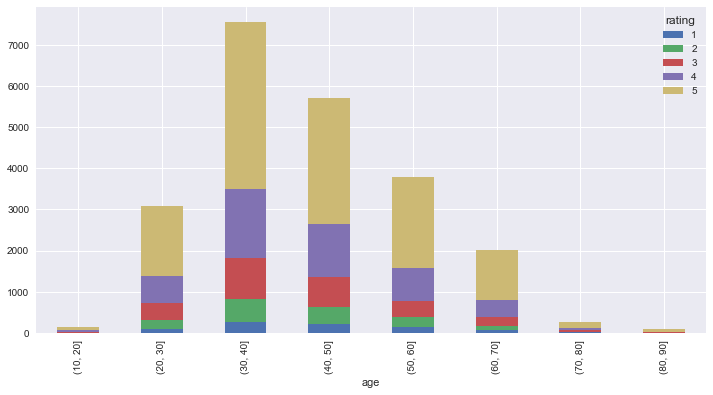

In [43]:
plt.rcParams["figure.figsize"] = (12,6)
df.groupby(['rating', pd.cut(df['age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

** The most satisfied age group is between 30 and 50.**

# Review Length and Rating Class Bar Plot

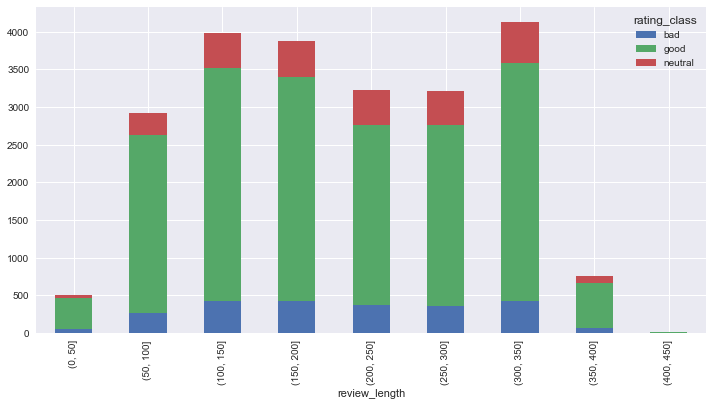

In [44]:
plt.rcParams["figure.figsize"] = (12,6)
df.groupby(['rating_class', pd.cut(df['review_length'], np.arange(0,500,50))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

# Review Length Distribution Plot

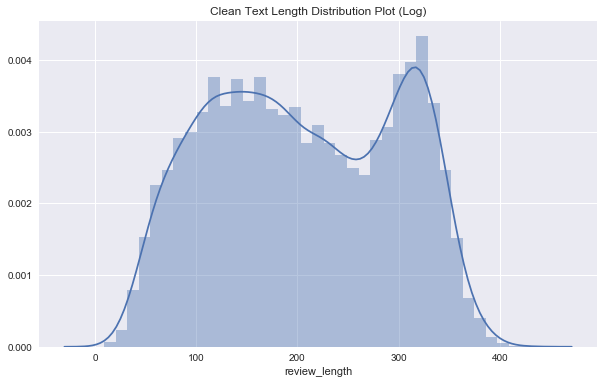

In [45]:
plt.figure(figsize = (10,6))
sns.distplot(df.review_length)
_ = plt.xlabel('review_length')
_ = plt.title('Clean Text Length Distribution Plot (Log)')

# Numerical Features Correlation Heatmap

Text(0.5,1,'Heatmap of Correlation Between Non-Categorical Features')

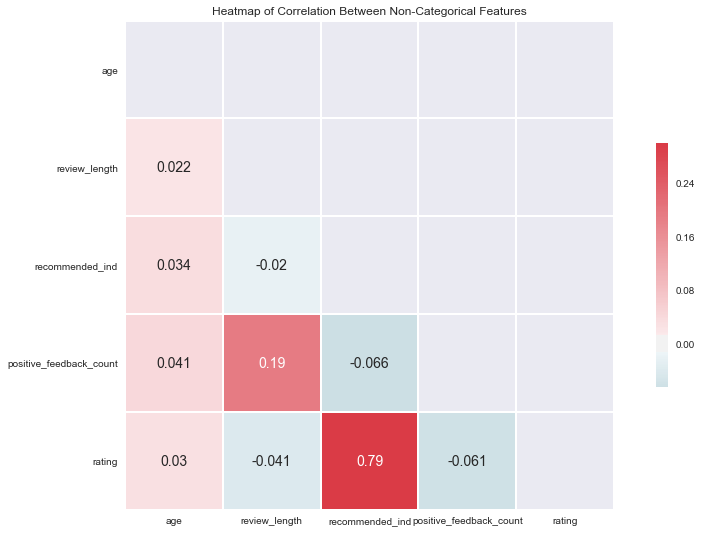

In [46]:
sns.set()
corr = df[['age','review_length', 'recommended_ind','positive_feedback_count', 'rating']].corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, annot_kws={"size": 14},
            square=True, linewidths=1, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Between Non-Categorical Features')


** As it is seen on the Correlation Heatmap, there is a negative strong correlation between Age and the review length, since the elderly customers tend to leave short feedbacks.**

## Review Length and Ratings Facetgrid Plot.

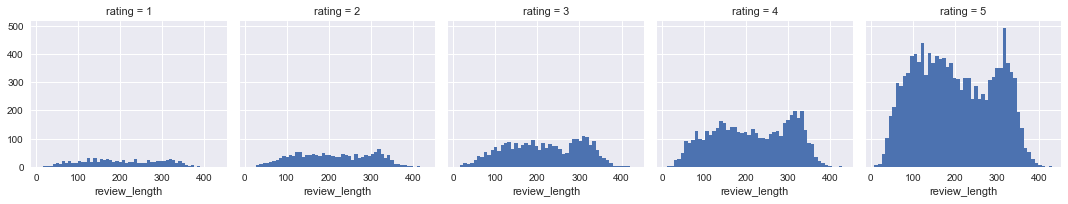

In [47]:
g = sns.FacetGrid(data=df, col='rating')
g.map(plt.hist, 'review_length', bins=50)

**There appears that satisfied customers tend to leave long reviews.**

## Review Length Box Plots Based on Each Ratings

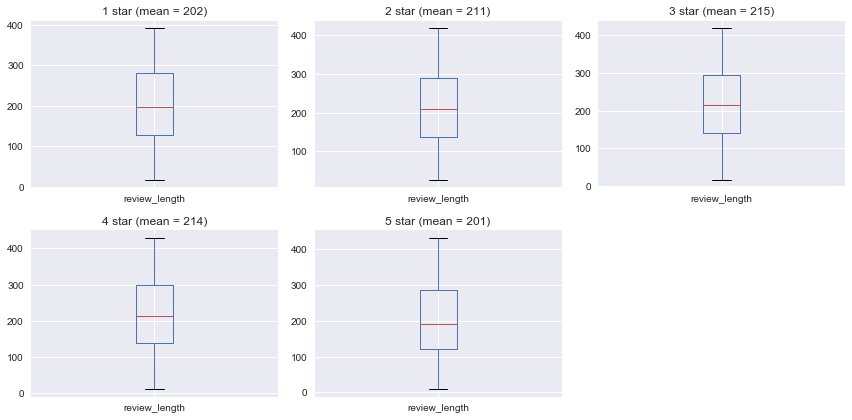

Correlation between stars and length of review text is not obvious.


In [48]:
# Average review length based on the star rating
star_review_lengths = { star: df.review_length[df.rating == star] for star in range(1,6) }

for star in range(1,6):
    plt.subplot(2,3,star)
    star_review_lengths[star].plot(kind='box')
    average_length = str( int( round( np.mean(star_review_lengths[star]) , 0) ) )
    plt.title( str(star) + ' star (mean = '+ average_length +')' )
    plt.suptitle("")
    
plt.tight_layout()    
plt.show()

print('Correlation between stars and length of review text is not obvious.')

**Rating 3 has the maximum average review length and minimum average length is Rating 5 with 201 characters.**

# Ratings and Feedback Usefulness Bar Plot 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

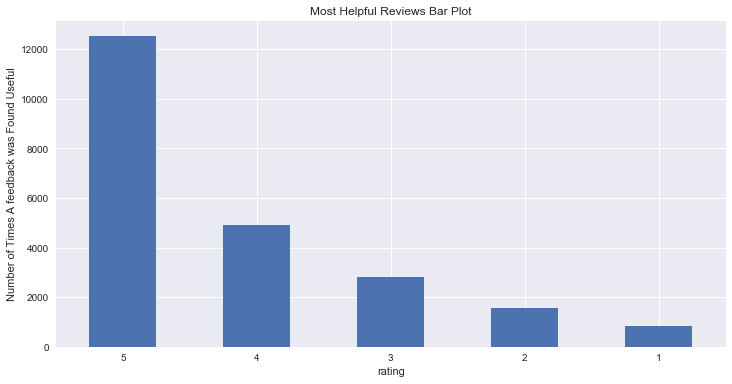

In [49]:
plt.figure(figsize = (12,6))
df_class = df.groupby('rating')['positive_feedback_count'].count().iloc[::-1]
df_class.plot.bar()
plt.xlabel('rating')
plt.ylabel('Number of Times A feedback was Found Useful')
plt.title('Most Helpful Reviews Bar Plot')
plt.xticks(rotation = 0)

## Most Common 100 Words(Top 10)

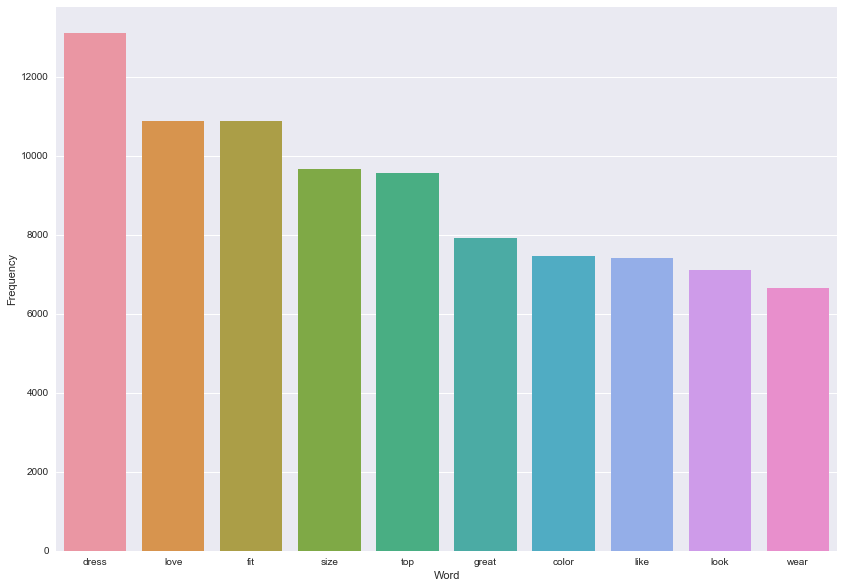

In [50]:
top_N = 100
cleaned_text = [str(txt) for text in df['clean_text'] for txt in text.split(' ') if len(txt)>2 and txt not in 'not, nan']

word_dist = nltk.FreqDist(cleaned_text)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(14,10))
sns.set()
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))

**The most common top 10 words are : 'dress, love, fit, size, look, top, wear, like, great, color'**

# Tokens Length Histogram Plot

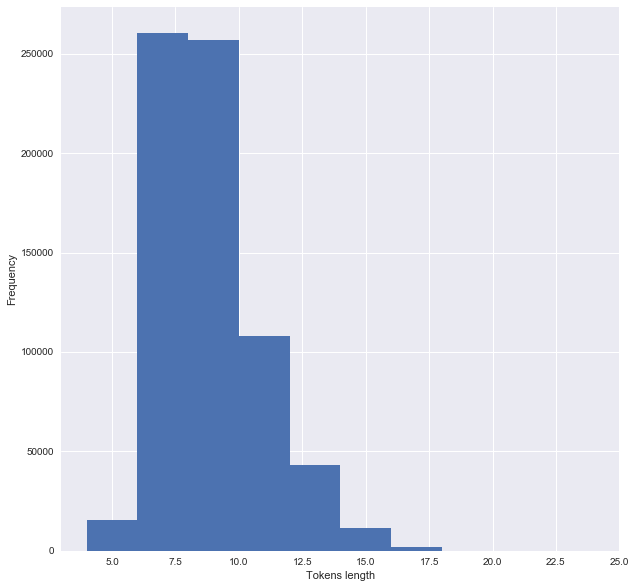

In [51]:
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tokens length')
plt.ylabel('Frequency')
plt.hist([len(token) for tokens in df["tokens"] for token in tokens.split(' ')])
plt.show()

# Wordcloud with All Ratings

In [52]:
from wordcloud import WordCloud, STOPWORDS

In [53]:
cleaned_text_all = [str(txt) for text in df['clean_text'] for txt in text.split(' ') if len(txt)>2 and txt not in 'not, nan']

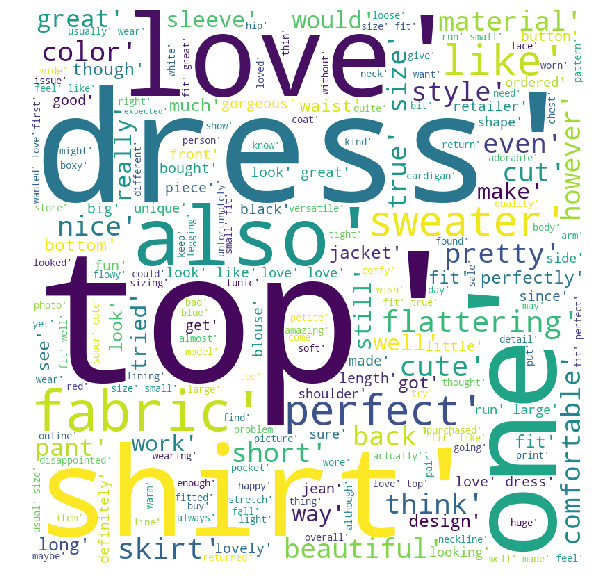

In [54]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(cleaned_text_all))
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Wordcloud with Rating Class-Good

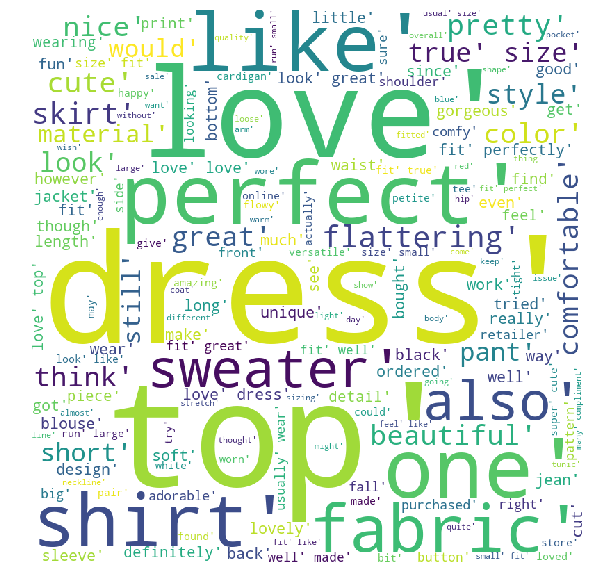

In [55]:
cleaned_text_r5 = [str(txt) for text in df[df['rating_class']=='good']['clean_text'] for txt in text.split(' ') if len(txt)>2 and txt not in 'not, nan']

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(cleaned_text_r5))
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Wordcloud with Rating Class-Neutral

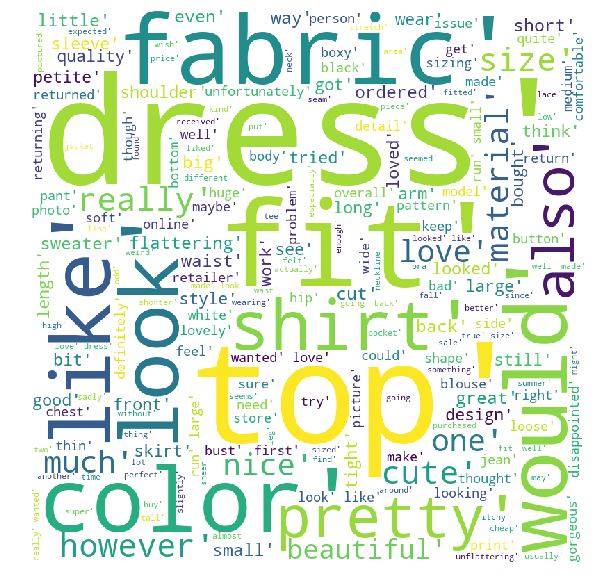

In [56]:
cleaned_text_r4 = [str(txt) for text in df[df['rating_class']=='neutral']['clean_text'] for txt in text.split(' ') if len(txt)>2 and txt not in 'not, nan']

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(cleaned_text_r4))
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Wordcloud with Rating Class-Bad

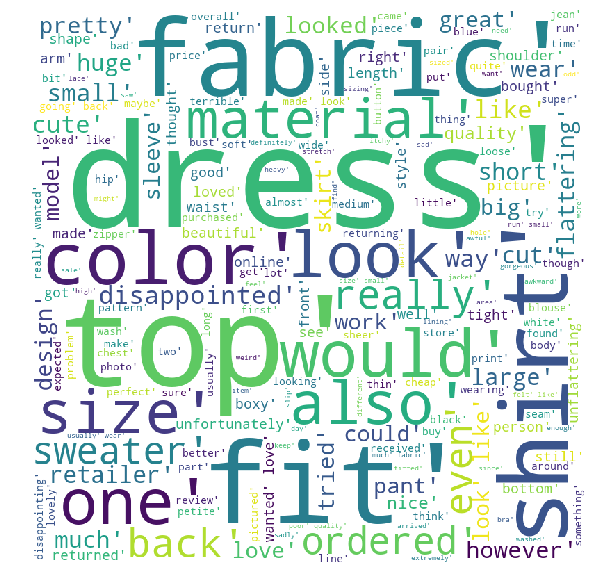

In [57]:
cleaned_text_r3 = [str(txt) for text in df[df['rating_class']=='bad']['clean_text'] for txt in text.split(' ') if len(txt)>2 and txt not in 'not, nan']

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(cleaned_text_r3))
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

** In Rating Bad word cloud, we have started to meet some negative words such as 'disappointed, problem, sadly, bad, waist, unflattering, loose, poor, return, terrible, awful, unfortunately, etc.'**